In [286]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print('Setup Complete')

Setup Complete


In [287]:
df_train=pd.read_csv('train.csv',delimiter=';',header=None)

"""
This line of code reads in a CSV file called "train.csv" using the pandas library's read_csv() function.
The file is separated by semicolons (delimiter=';') and has no header row (header=None). 
The resulting DataFrame is stored in a variable called df_train.
"""
print('Dataset Successfully Imported')

Dataset Successfully Imported


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,5,9,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### **Organizing the Dataset** 

In [288]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [289]:
#Adding Columns to dataset
df_train.columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [290]:
#dropping 0 index
df_train = df_train.drop(index=0)

In [291]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [292]:
df_train.shape

(45211, 17)

In [293]:
#replacing 'unknown' with null value'
df_train.replace('unknown',np.NaN, inplace=True)

In [294]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
2,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
4,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
5,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [295]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 6.2+ MB


In [296]:
#Converting to numeric value
df_train[['age', 'balance','day','duration','campaign','pdays','previous']] = df_train[['age', 'balance','day','duration','campaign','pdays','previous']].apply(pd.to_numeric)

In [297]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [298]:
for i, column in enumerate(df_train.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df_train[column].nunique()))
    

0. Age: 77
1. Job: 11
2. Marital: 3
3. Education: 3
4. Default: 2
5. Balance: 7168
6. Housing: 2
7. Loan: 2
8. Contact: 2
9. Day: 31
10. Month: 12
11. Duration: 1573
12. Campaign: 48
13. Pdays: 559
14. Previous: 41
15. Poutcome: 3
16. Y: 2


In [299]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


### **Data Cleaning**

In [300]:
#dropping null values
df_train=df_train.dropna()

In [301]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24061 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [302]:
#checking if any duplicate values are present
df_train.duplicated().sum()

0

In [303]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24061 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


### **EDA & Data Visualization**

In [304]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
print('Setup Complete')

Setup Complete


In [305]:
df_train['job'].describe()

count           7842
unique            11
top       management
freq            1753
Name: job, dtype: object

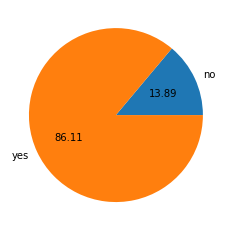

In [306]:
loan_counts = df_train['loan'].value_counts()
yes_no_counts = loan_counts.loc[['yes', 'no']]
plt.pie(yes_no_counts,labels=['no','yes'],autopct="%0.2f")
plt.show()

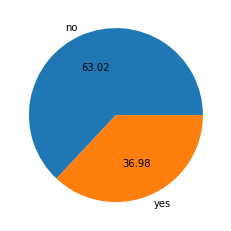

In [307]:
housing_counts = df_train['housing'].value_counts()
yes_no_counts = housing_counts.loc[['yes', 'no']]
plt.pie(yes_no_counts,labels=['no','yes'],autopct="%0.2f")
plt.show()

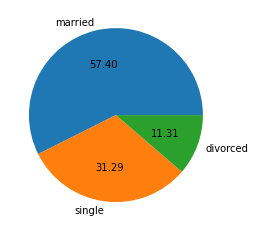

In [308]:
martial_counts = df_train['marital'].value_counts()
yes_no_counts = martial_counts.loc[['married', 'single','divorced']]
plt.pie(yes_no_counts,labels=['married','single','divorced'],autopct="%0.2f")
plt.show()

In [309]:
df_train['job'].value_counts()

management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: job, dtype: int64

In [310]:
df_train['education'].value_counts()

secondary    4197
tertiary     2633
primary      1012
Name: education, dtype: int64

In [311]:
df_train['poutcome'].value_counts()

failure    4679
other      1750
success    1413
Name: poutcome, dtype: int64

In [312]:
df_train['housing'].value_counts()

yes    4942
no     2900
Name: housing, dtype: int64

In [313]:
df_train['y'].value_counts()

no     6056
yes    1786
Name: y, dtype: int64

In [314]:
import seaborn as sns

In [315]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24061 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


<Figure size 1440x432 with 0 Axes>

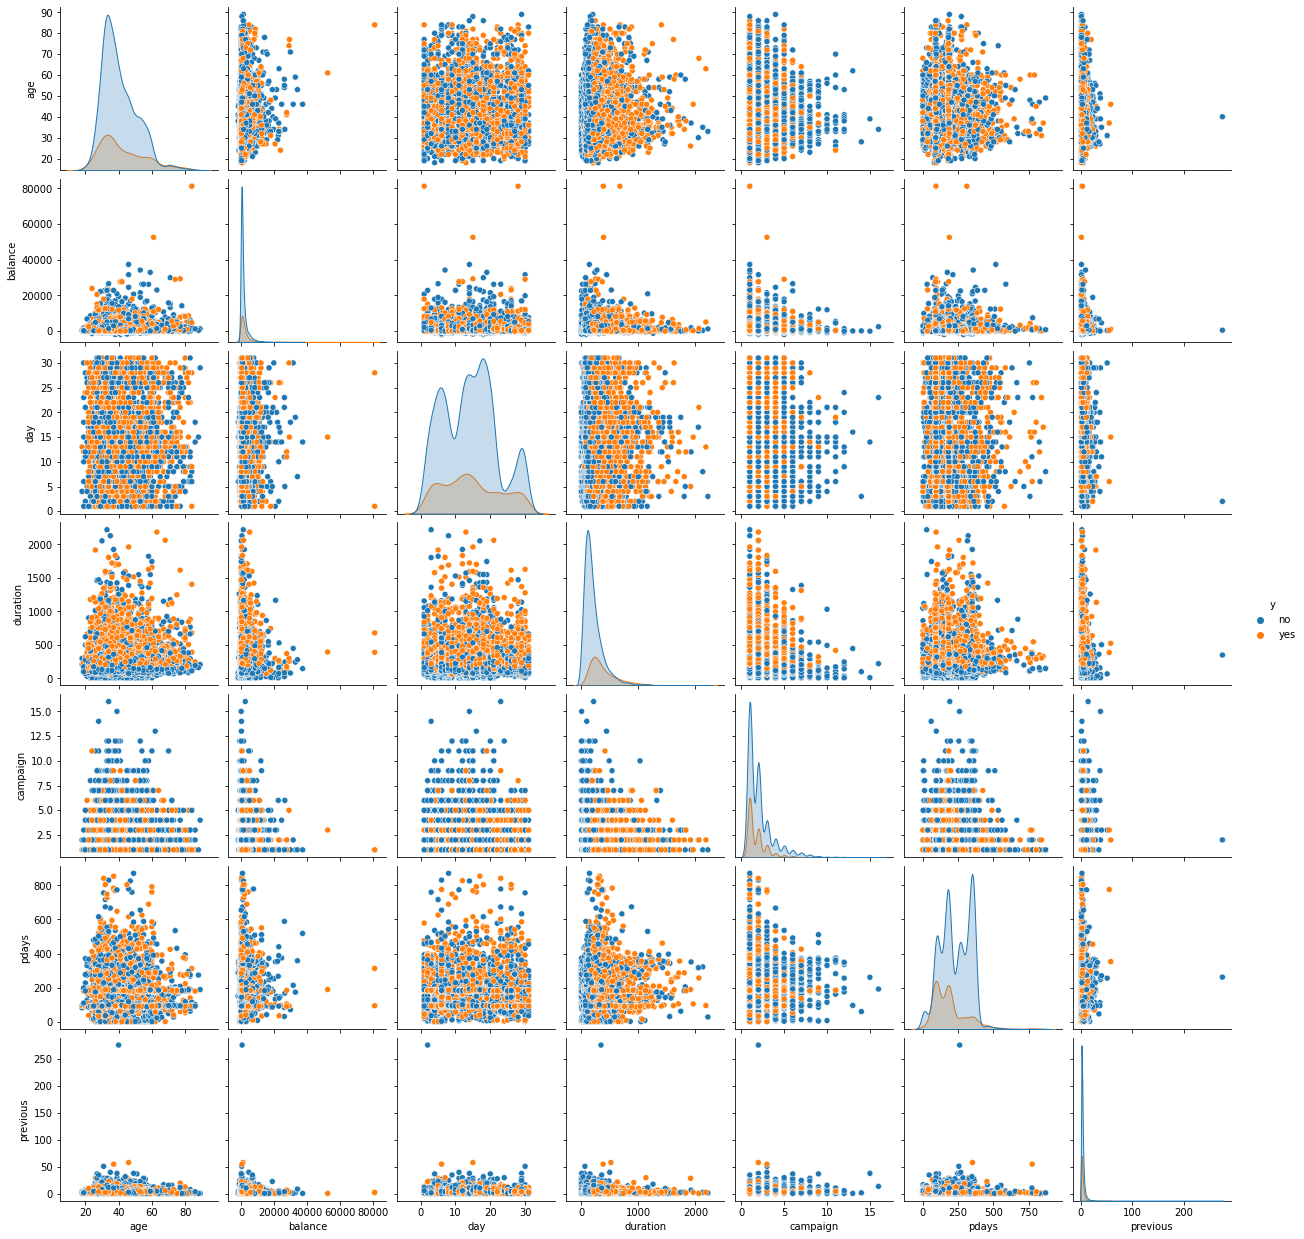

In [316]:
plt.figure(figsize=(20,6))
sns.pairplot(df_train,hue='y')

<AxesSubplot:>

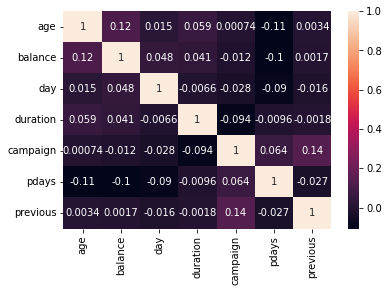

In [317]:
sns.heatmap(df_train.corr(),annot=True)

In [318]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24061 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.3+ MB


In [319]:
#Function to label the count on top of each bar in graph

def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)    

Age


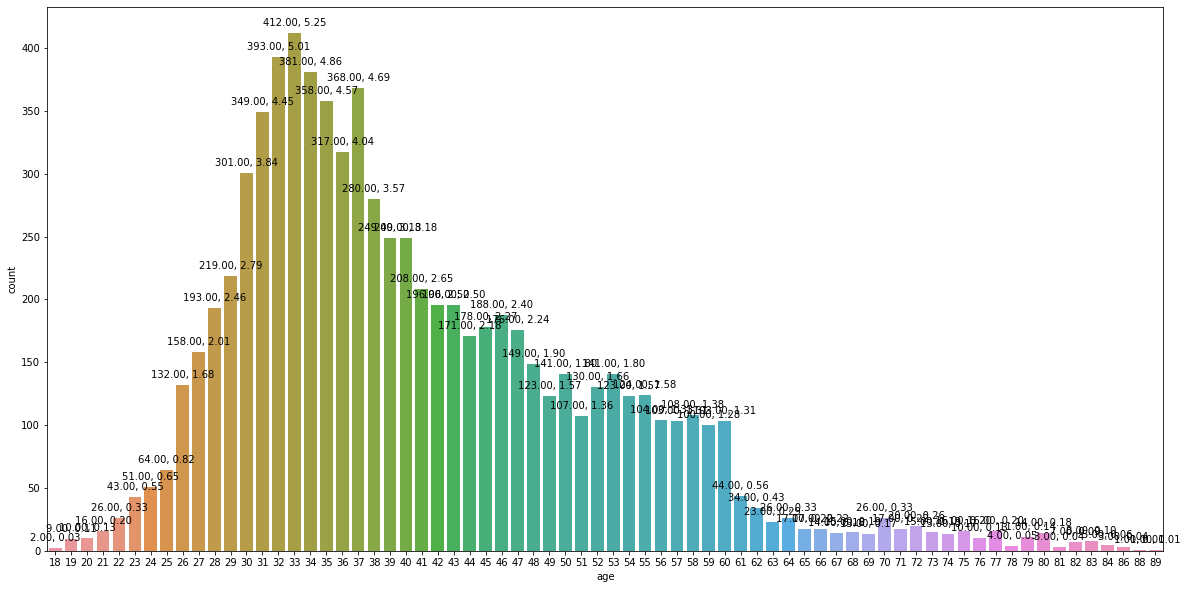

Job


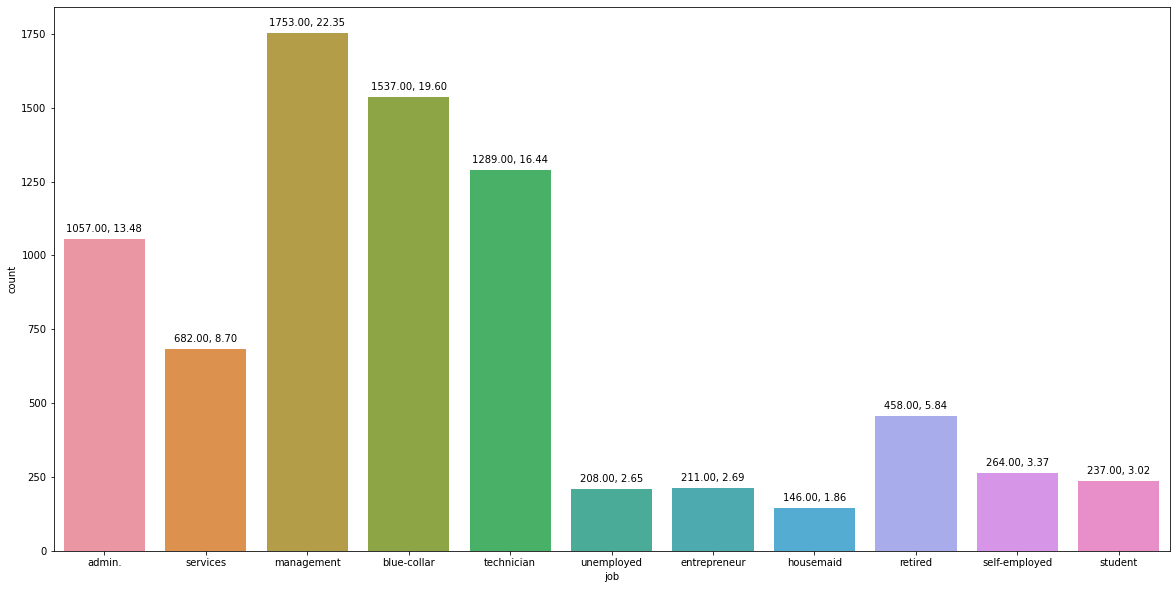

Marital


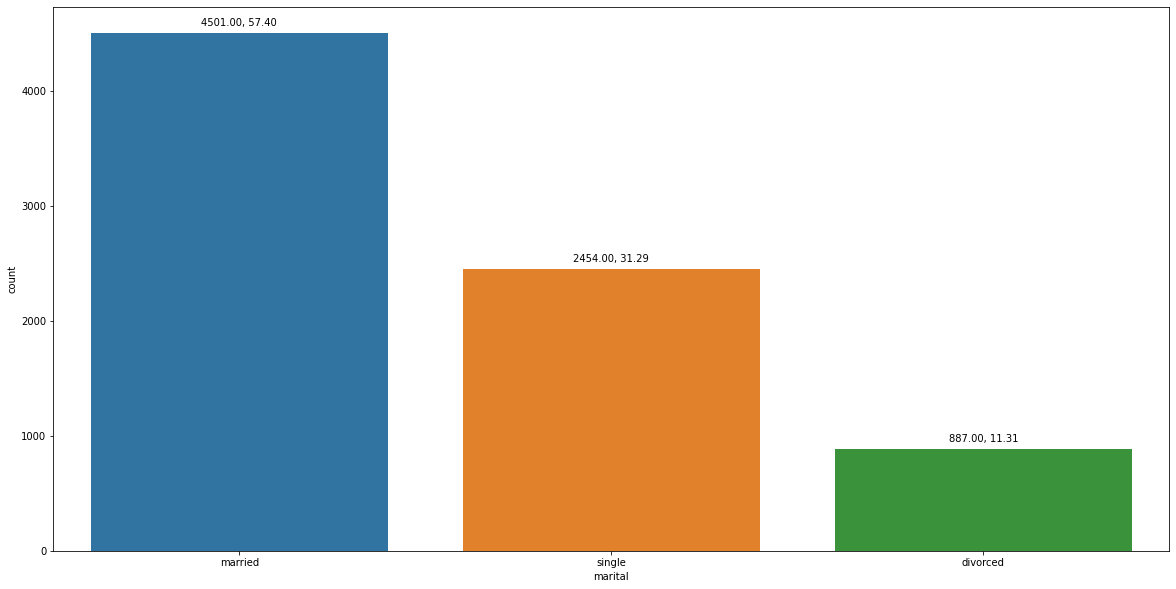

Education


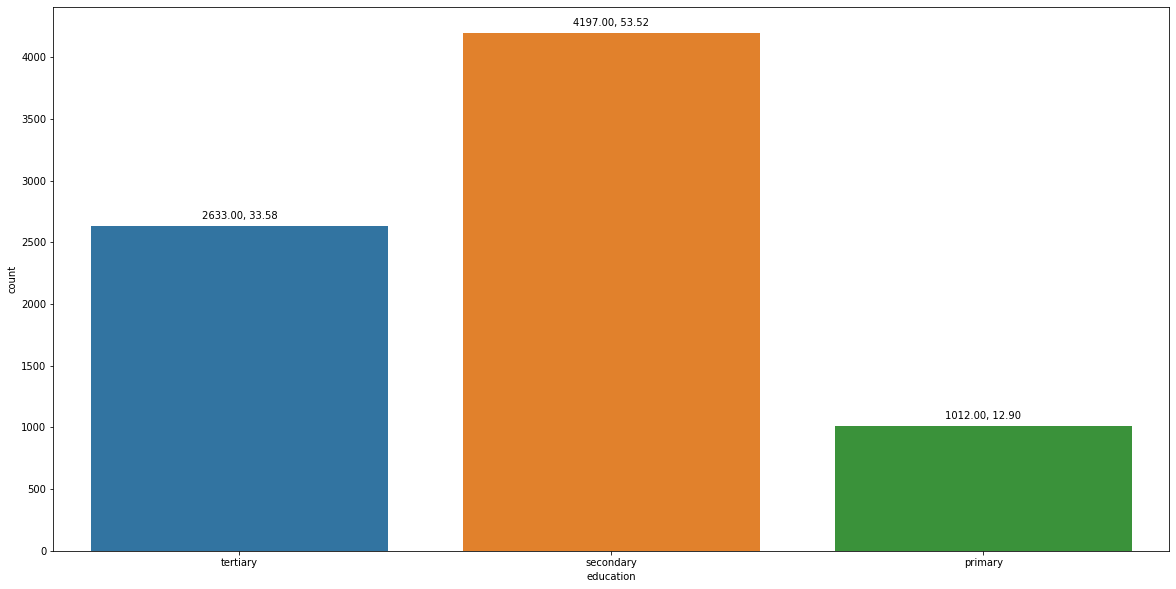

Default


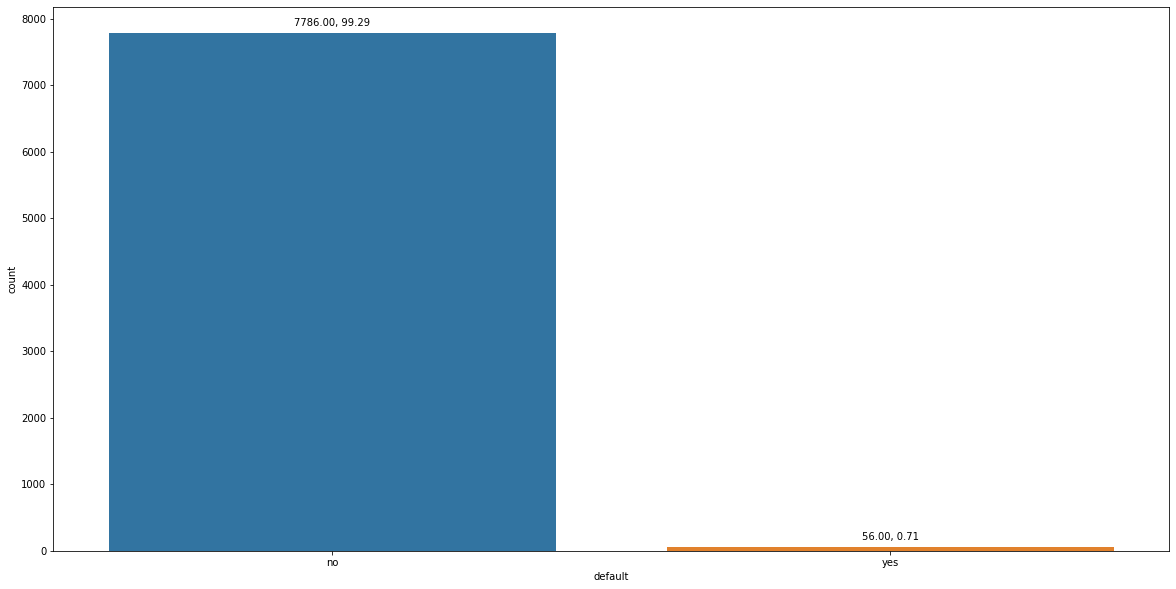

Balance


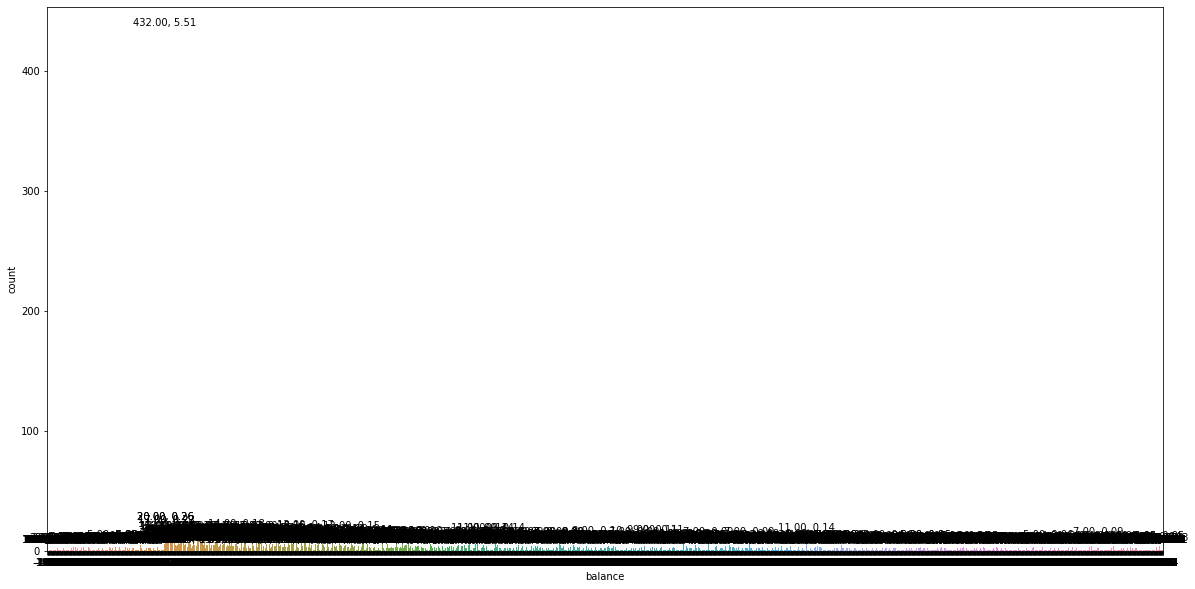

Housing


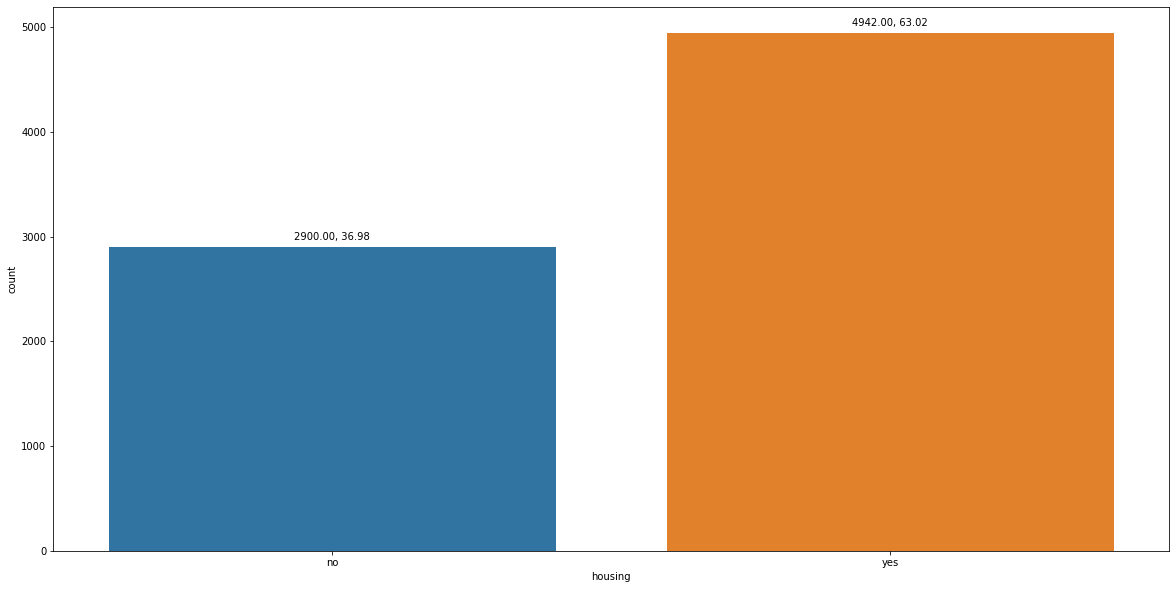

Loan


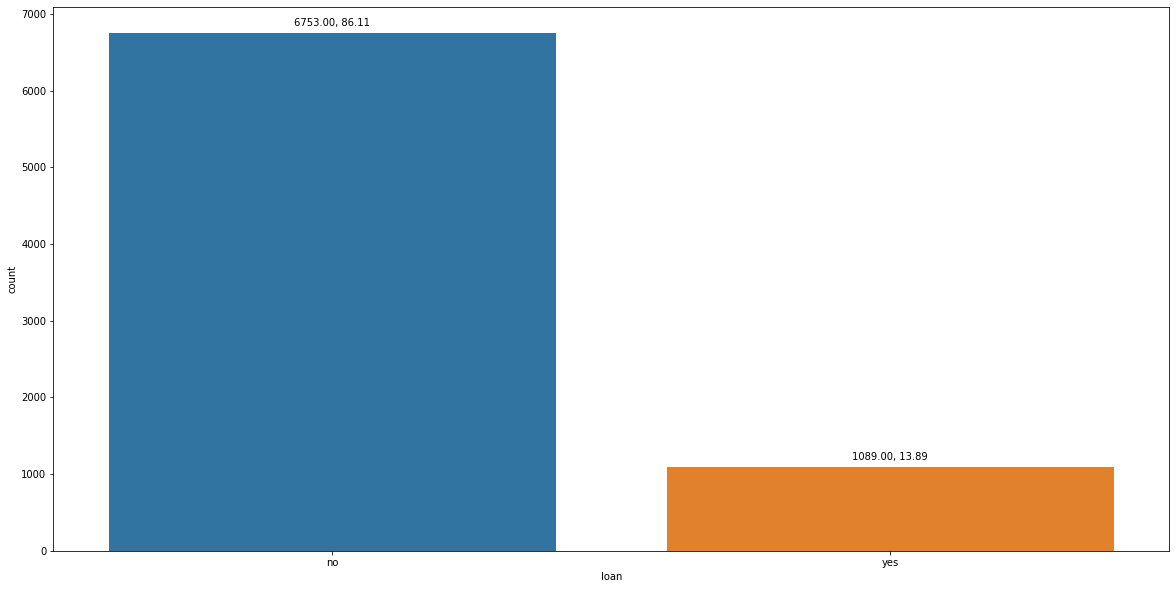

Contact


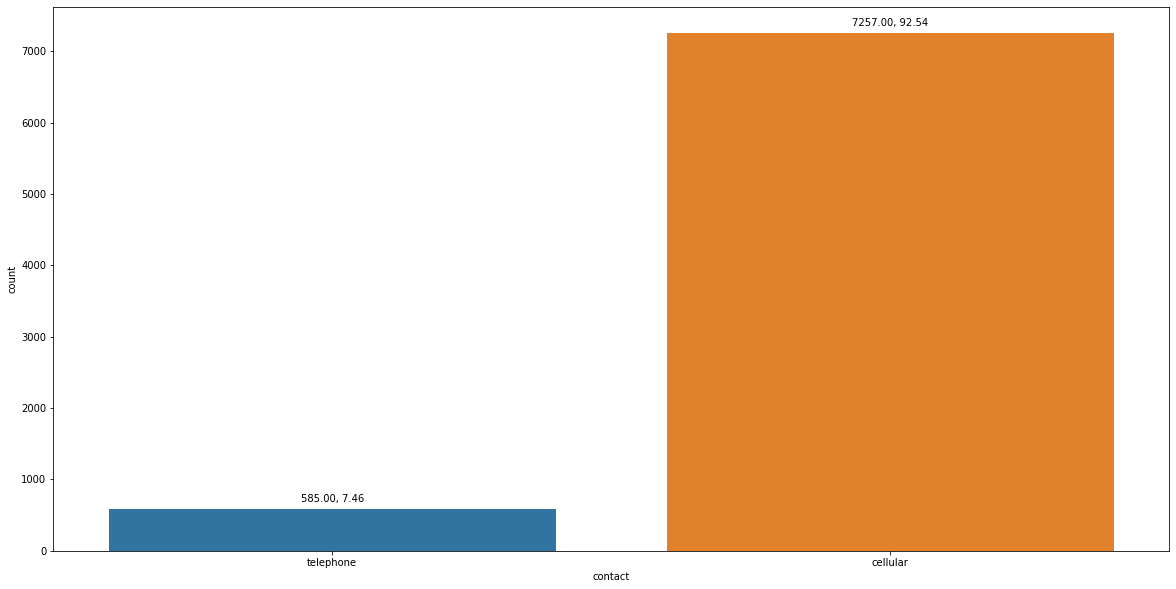

Day


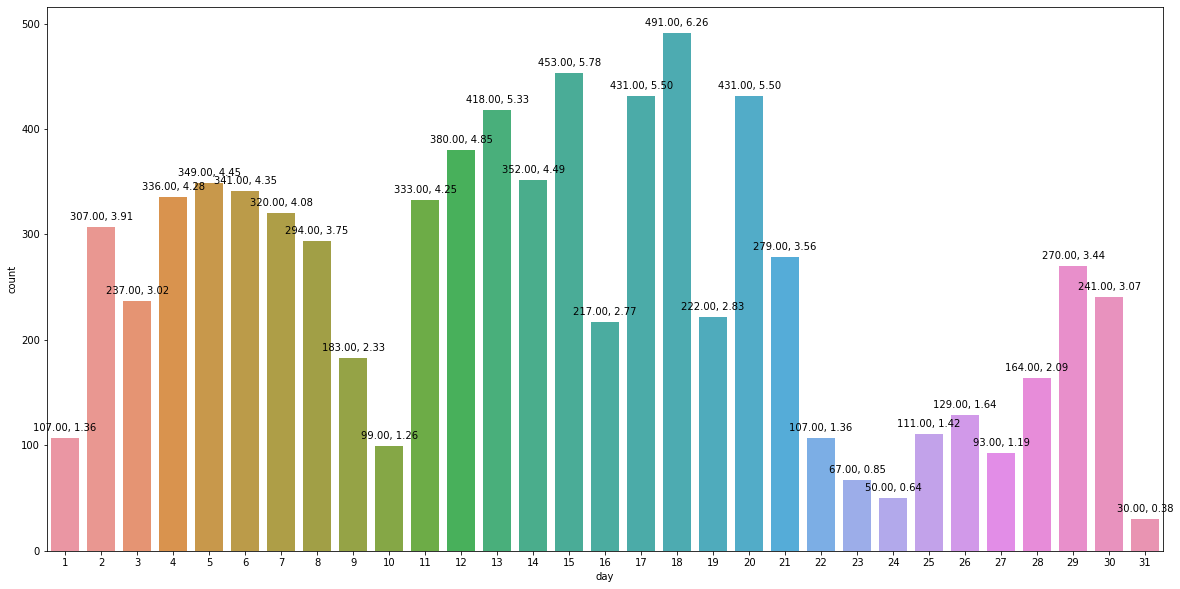

Month


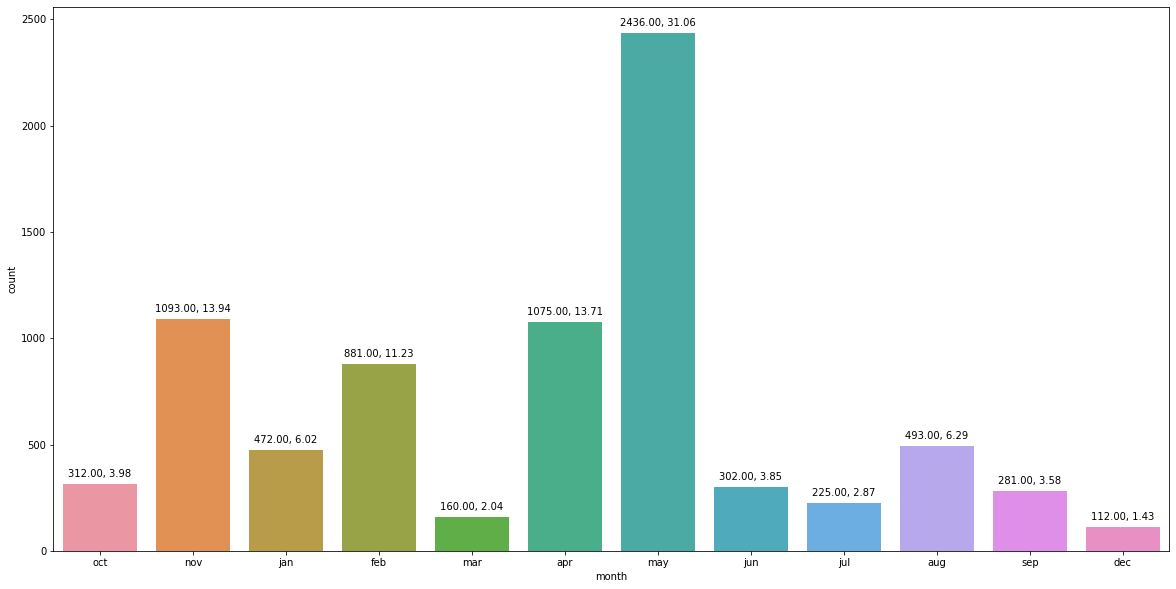

Duration


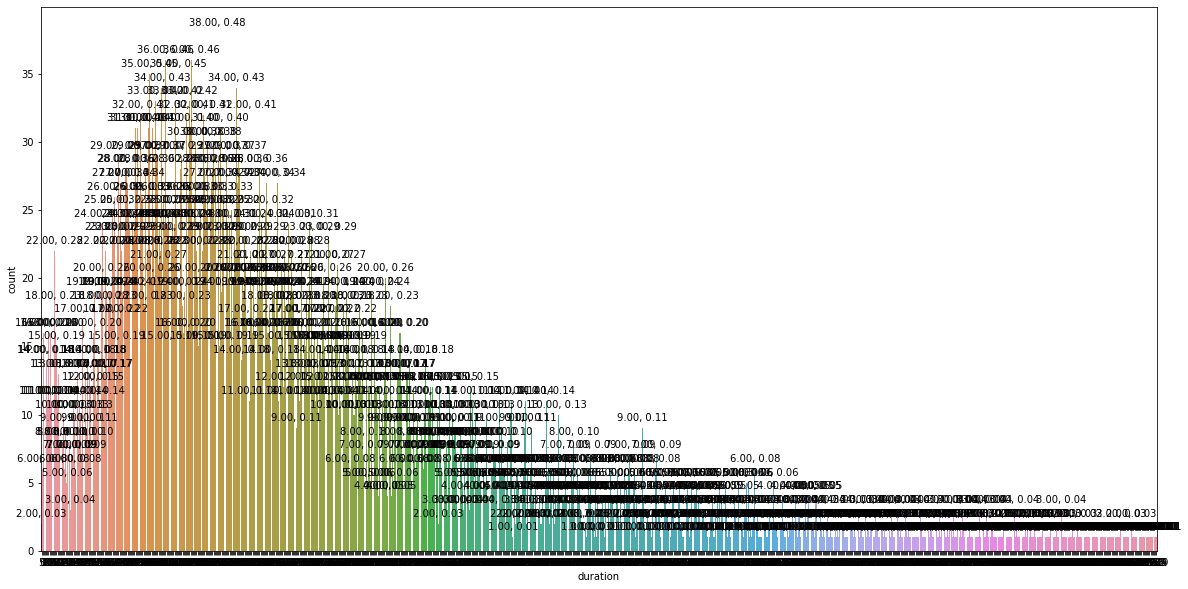

Campaign


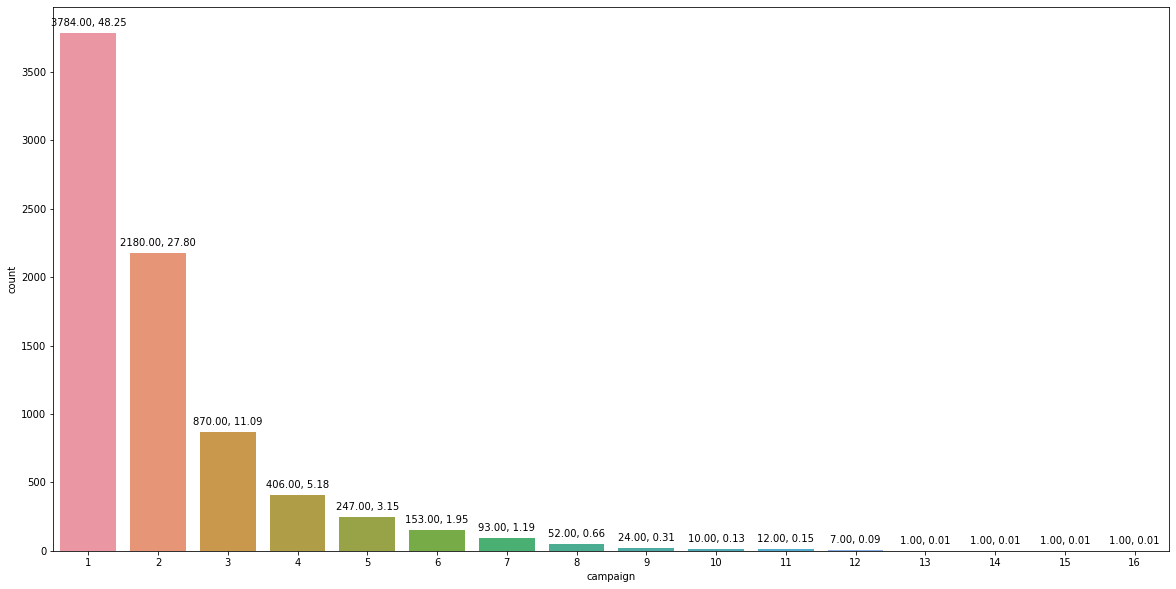

Pdays


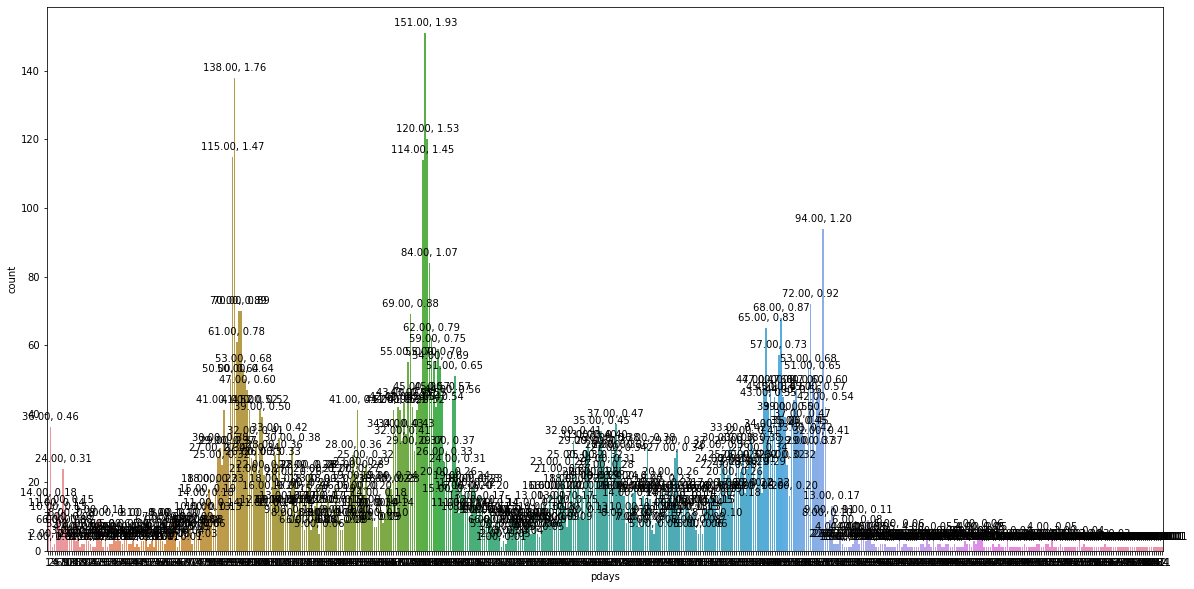

Previous


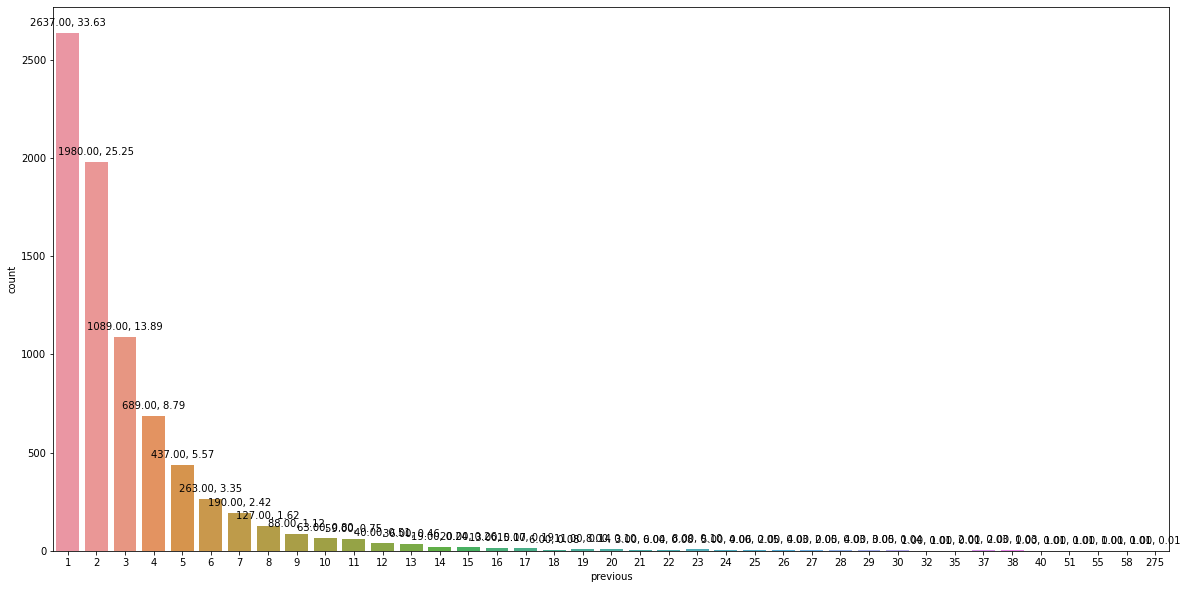

Poutcome


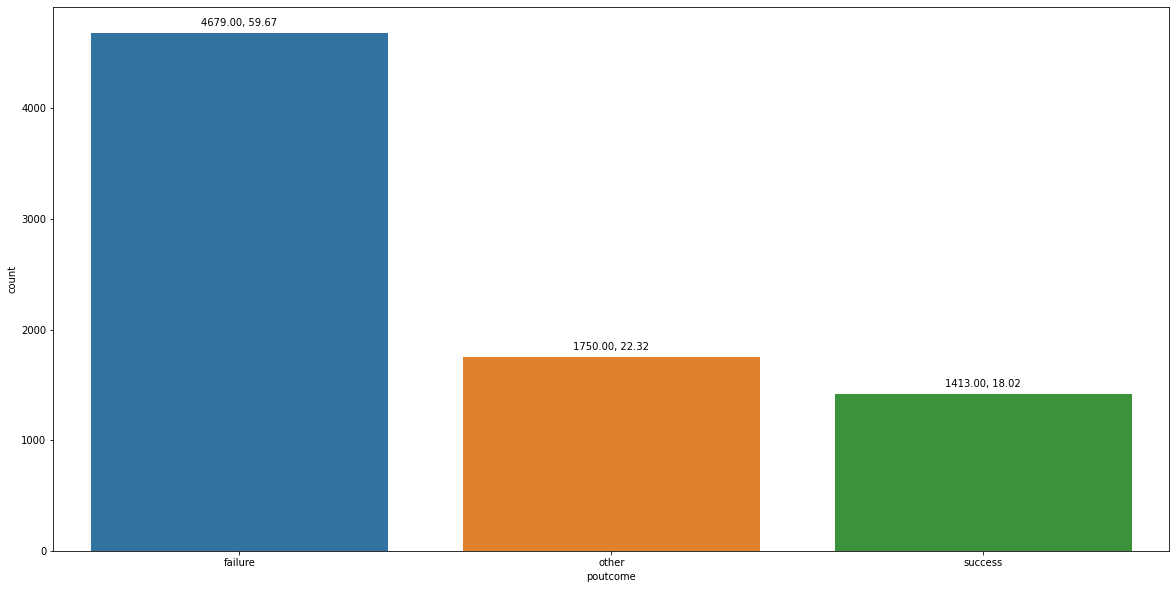

Y


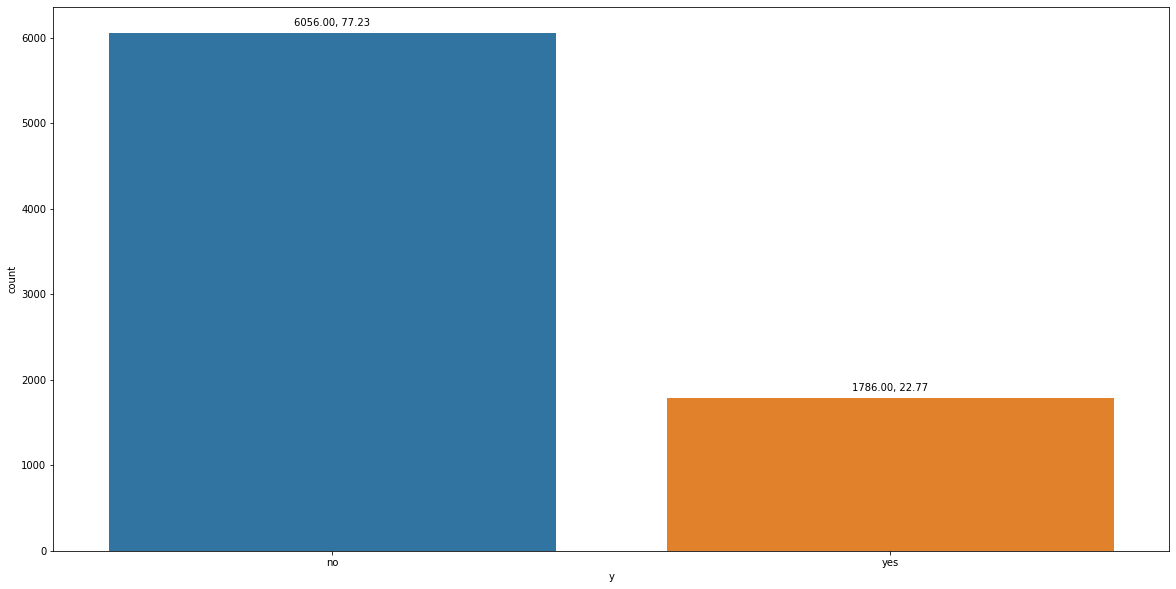

In [320]:
features=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
for column in features:
    plt.figure(figsize=(20, 10))
    print(column.title())
    ax = sns.countplot(x = df_train[column])
    label_values(ax)
    plt.show()

In [321]:
#Using Get Dummies
pd.get_dummies(df_train,df_train.columns[df_train.dtypes == 'object'])

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_no,y_yes
24061,33,882,21,39,1,151,3,1,0,0,...,0,0,0,1,0,1,0,0,1,0
24063,42,-247,21,519,1,166,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
24065,33,3444,21,144,1,91,4,0,0,0,...,0,0,0,1,0,1,0,0,0,1
24073,36,2415,22,73,1,86,4,0,0,0,...,0,0,0,1,0,0,1,0,1,0
24078,36,0,23,140,1,143,3,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,34,1475,16,1166,3,530,12,0,1,0,...,0,0,1,0,0,0,1,0,1,0
45202,53,583,17,226,1,184,4,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45205,73,2850,17,300,1,40,8,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45209,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [322]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24061,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24063,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24065,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24073,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24078,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45202,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [323]:
for i in df_train.columns[df_train.dtypes == 'object']:
    print(i,"::",df_train[i].unique())

job :: ['admin.' 'services' 'management' 'blue-collar' 'technician' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']
marital :: ['married' 'single' 'divorced']
education :: ['tertiary' 'secondary' 'primary']
default :: ['no' 'yes']
housing :: ['no' 'yes']
loan :: ['no' 'yes']
contact :: ['telephone' 'cellular']
month :: ['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']
poutcome :: ['failure' 'other' 'success']
y :: ['no' 'yes']


In [324]:
df=df_train
# Using Categorical dtypes
for i in df_train.columns[df_train.dtypes == 'object']:
    print(i,"::")
    df[i] = df_train[i].astype('category')
    df[i] = df_train[i].cat.codes

job ::
marital ::
education ::
default ::
housing ::
loan ::
contact ::
month ::
poutcome ::
y ::


<ipython-input-324-426bdfda1682>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df_train[i].astype('category')
<ipython-input-324-426bdfda1682>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df_train[i].cat.codes


In [325]:
df.job.head()

24061    0
24063    0
24065    7
24073    4
24078    4
Name: job, dtype: int8

In [326]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24061,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0,0
24063,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24065,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24073,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1,0
24078,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1


In [327]:
df.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
y             int8
dtype: object

In [328]:
df.y.unique()

array([0, 1], dtype=int8)

In [329]:
df.shape

(7842, 17)

In [330]:
X=df.iloc[:,0:16]

In [331]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24061,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0
24063,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1
24065,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0
24073,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1
24078,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1
45202,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2
45205,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0
45209,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2


In [332]:
y=df['y']

In [333]:
y

24061    0
24063    1
24065    1
24073    0
24078    1
        ..
45200    0
45202    1
45205    1
45209    1
45211    0
Name: y, Length: 7842, dtype: int8

### **Building Model**

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [336]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [337]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [338]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:-",accuracy_score(y_test,y_pred1))
print("confusion_matrix:-",confusion_matrix(y_test,y_pred1))
print("precision_score:-",precision_score(y_test,y_pred1))

accuracy:- 0.7915869980879541
confusion_matrix:- [[988 212]
 [115 254]]
precision_score:- 0.5450643776824035


In [339]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:-",accuracy_score(y_test,y_pred3))
print("confusion_matrix:-",confusion_matrix(y_test,y_pred3))
print("precision_score:-",precision_score(y_test,y_pred3))

accuracy:- 0.7934990439770554
confusion_matrix:- [[1079  121]
 [ 203  166]]
precision_score:- 0.578397212543554


In [340]:
#importing all libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [341]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [342]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [343]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [344]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.6322498406628426, 0.20285714285714285)

In [345]:
accuracy_scores = []
precision_scores = []
classifiers=[]
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    classifiers.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6322498406628426
Precision -  0.20285714285714285
For  KN
Accuracy -  0.7782026768642447
Precision -  0.5390334572490706
For  DT
Accuracy -  0.8425748884639898
Precision -  0.690625
For  LR
Accuracy -  0.8272785213511791
Precision -  0.6725352112676056
For  RF
Accuracy -  0.8393881453154876
Precision -  0.6881028938906752
For  AdaBoost
Accuracy -  0.851497769279796
Precision -  0.7281879194630873
For  BgC
Accuracy -  0.8355640535372849
Precision -  0.6618075801749271
For  ETC
Accuracy -  0.8304652644996813
Precision -  0.6859205776173285
For  GBDT
Accuracy -  0.8502230720203952
Precision -  0.7310344827586207
For  xgb
Accuracy -  0.8483110261312938
Precision -  0.6932153392330384


In [346]:
performance_df = pd.DataFrame({'Algorithm':classifiers,'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [347]:
performance_df

,Algorithm,Accuracy,Precision
8,GBDT,0.850223,0.731034
5,AdaBoost,0.851498,0.728188
9,xgb,0.848311,0.693215
2,DT,0.842575,0.690625
4,RF,0.839388,0.688103
7,ETC,0.830465,0.685921
3,LR,0.827279,0.672535
6,BgC,0.835564,0.661808
1,KN,0.778203,0.539033
0,SVC,0.632250,0.202857


In [348]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [349]:
performance_df1

,Algorithm,variable,value
0,GBDT,Accuracy,0.850223
1,AdaBoost,Accuracy,0.851498
2,xgb,Accuracy,0.848311
3,DT,Accuracy,0.842575
4,RF,Accuracy,0.839388
5,ETC,Accuracy,0.830465
6,LR,Accuracy,0.827279
7,BgC,Accuracy,0.835564
8,KN,Accuracy,0.778203
9,SVC,Accuracy,0.632250


In [350]:
#as we can see GradientBoostingClassifier has higher accuracy as well as precision so we use GradientBoostingClassifier.

In [351]:
accuracy,precision=train_classifier(gbdt,X_train,y_train,X_test,y_test)

In [352]:
print('Accuracy:-',accuracy)
print('Precision',precision)

Accuracy:- 0.8502230720203952
Precision 0.7310344827586207


In [353]:
# Importing test dataset
df_test = pd.read_csv('test.csv',delimiter=';',header=None)
print('Test dataset imported successfully')

Test dataset imported successfully


In [354]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [355]:
df_test.columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [356]:
df_test.replace('unknown',np.NaN, inplace=True)

In [357]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,NaN,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,-1,0,NaN,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,NaN,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [358]:
df_test=df_test.dropna()

In [359]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
4505,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4515,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [360]:
df_test=df_test.drop(index=0)

In [361]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
4505,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4515,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [362]:
df_test[['age', 'balance','day','duration','campaign','pdays','previous']] = df_test[['age', 'balance','day','duration','campaign','pdays','previous']].apply(pd.to_numeric)

In [363]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 2 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        764 non-null    int64 
 1   job        764 non-null    object
 2   marital    764 non-null    object
 3   education  764 non-null    object
 4   default    764 non-null    object
 5   balance    764 non-null    int64 
 6   housing    764 non-null    object
 7   loan       764 non-null    object
 8   contact    764 non-null    object
 9   day        764 non-null    int64 
 10  month      764 non-null    object
 11  duration   764 non-null    int64 
 12  campaign   764 non-null    int64 
 13  pdays      764 non-null    int64 
 14  previous   764 non-null    int64 
 15  poutcome   764 non-null    object
 16  y          764 non-null    object
dtypes: int64(7), object(10)
memory usage: 107.4+ KB


In [364]:
pd.get_dummies(df_train,df_train.columns[df_train.dtypes == 'object'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24061,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0,0
24063,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24065,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24073,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1,0
24078,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45202,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2,1
45205,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45209,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1


In [365]:
for i in df_test.columns[df_test.dtypes == 'object']:
    print(i,"::",df_test[i].unique())

job :: ['services' 'management' 'self-employed' 'blue-collar' 'admin.'
 'technician' 'unemployed' 'student' 'retired' 'housemaid' 'entrepreneur']
marital :: ['married' 'single' 'divorced']
education :: ['secondary' 'tertiary' 'primary']
default :: ['no' 'yes']
housing :: ['yes' 'no']
loan :: ['yes' 'no']
contact :: ['cellular' 'telephone']
month :: ['may' 'apr' 'feb' 'jan' 'jul' 'jun' 'nov' 'oct' 'aug' 'sep' 'dec' 'mar']
poutcome :: ['failure' 'other' 'success']
y :: ['no' 'yes']


In [366]:
df2=df_test
# Using Categorical dtypes
for i in df_test.columns[df_test.dtypes == 'object']:
    print(i,"::")
    df2[i] = df_test[i].astype('category')
    df2[i] = df_test[i].cat.codes

job ::
marital ::
education ::
default ::
housing ::
loan ::
contact ::
month ::
poutcome ::
y ::


In [367]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
3,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
6,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
7,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
10,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,32,9,2,1,0,309,1,1,0,16,0,346,1,234,3,0,0
4505,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0,1
4515,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0,0
4520,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [368]:
df2.shape

(764, 17)

In [369]:
X_1 = df2.iloc[:,0:16]

In [370]:
y_1 = df2['y']

In [371]:
X_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
3,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
6,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0
7,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1
10,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,32,9,2,1,0,309,1,1,0,16,0,346,1,234,3,0
4505,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0
4515,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0
4520,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [372]:
#predicting with Test Dataset
test_accuracy,test_precision=train_classifier(gbdt,X_train,y_train,X_1,y_1)

In [373]:
print("Accuracy in test dataset:-",test_accuracy)
print("Precision in test dataset:-",test_precision)

Accuracy in test dataset:- 0.8547120418848168
Precision in test dataset:- 0.7307692307692307
